Imports

In [25]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets
import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               
               'size': 10,
              }
import sys
sys.path.append("../.")
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data
from scipy.special import gamma
import mpld3
import os

Pick Which Videos and ROIs You Want

In [2]:
Sample0 ={}
Sample1 ={}
Sample2 ={}
Sample3 ={}

In [106]:
Samples = {}
x= "Dilute"
Samples[x]=4
x= "Actin"
Samples[x] = 5

In [110]:
SampleNames=['Dilute','Actin','Tub','Copoly']
print SampleNames[2]

Tub


In [113]:
# ##Dilute
# data_dir= "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\9.5\\2018_07_09Dilute9.5fps_3\\"
# ##Actin
# data_dir = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Actin\\2018_07_17\\40\\Actin40fps_3\\"
# ##Tubulin
# data_dir = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_17\\40\\tub40fps_1\\"
# ##Copoly
# data_dir = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\copoly40fps_2\\"

DataDirectories= ["Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\9.5\\2018_07_09Dilute9.5fps_3\\",
                 "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Actin\\2018_07_17\\40\\Actin40fps_3\\",
                 "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_17\\40\\tub40fps_1\\",
                 "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\copoly40fps_2\\"]


for i in range(len(SampleNames)):
    x= SampleNames[i]
    a = open(DataDirectories[i]+'\\RavsForFits.p','rb')
    Samples[x]= pickle.load(a)
    a.close()

In [114]:
Samples.keys()

['Tub', 'Dilute', 'Actin', 'Copoly']

Saving all at once

In [190]:
q_index =20
Dimensions = [128,256,256,256]
ROI = 0

In [191]:
PlotFits = False

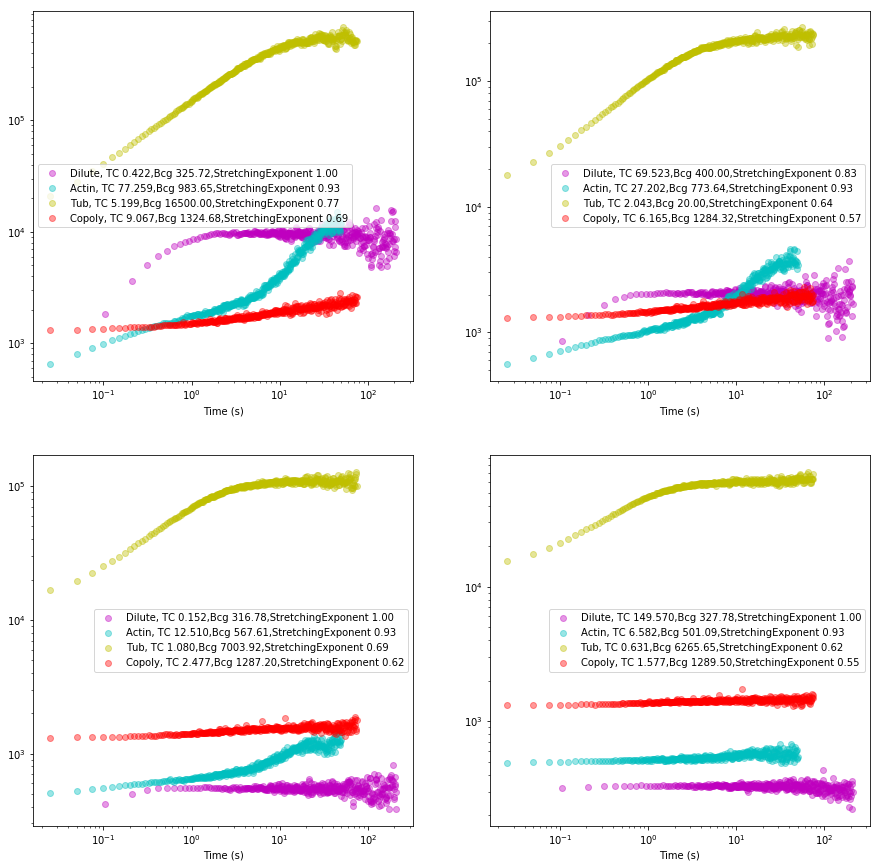

In [194]:
#Loop over four different q-values to do the fit
plt.figure(figsize=(15,15))
for i,q_index in enumerate([10,15,20,25]):
    ax = plt.subplot(2,2,i+1) #creating 4 subplots in a 2x2 grid
    for i in range(len(Samples)): ##For each Sample
        imDimension = Dimensions[i]
        col = ['mo','co','yo','ro','bo','ko']
        px = .196
        q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))


        for file in os.listdir(DataDirectories[i]):
            if file.startswith("AllResults"):
                filename = file

        f = open(DataDirectories[i]+filename,'rb')
        AllResults = pickle.load(f)
        f.close()
        SampleName= SampleNames[i]
        fitparamsA = AllResults['fitparams'+str(ROI)]
        theoryA = AllResults['theory'+str(ROI)]
        chiA = AllResults['chi2'+str(ROI)]
        times = Samples[SampleName]['times'+str(ROI)]
        ravs= Samples[SampleName]['ravs'+str(ROI)]

        plt.loglog(times,ravs[:,q_index],col[i],alpha=0.4, label = '%s, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
                   %(SampleName, fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))
    if(PlotFits==True):   
        plt.loglog(times[:len(theoryA[q_index,:])], theoryA[q_index,:], '-b',lw=3)

        plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
    plt.xlabel("Time (s)")
    plt.legend()


C:\Users\Student\Anaconda2\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in divide
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in divide
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in divide


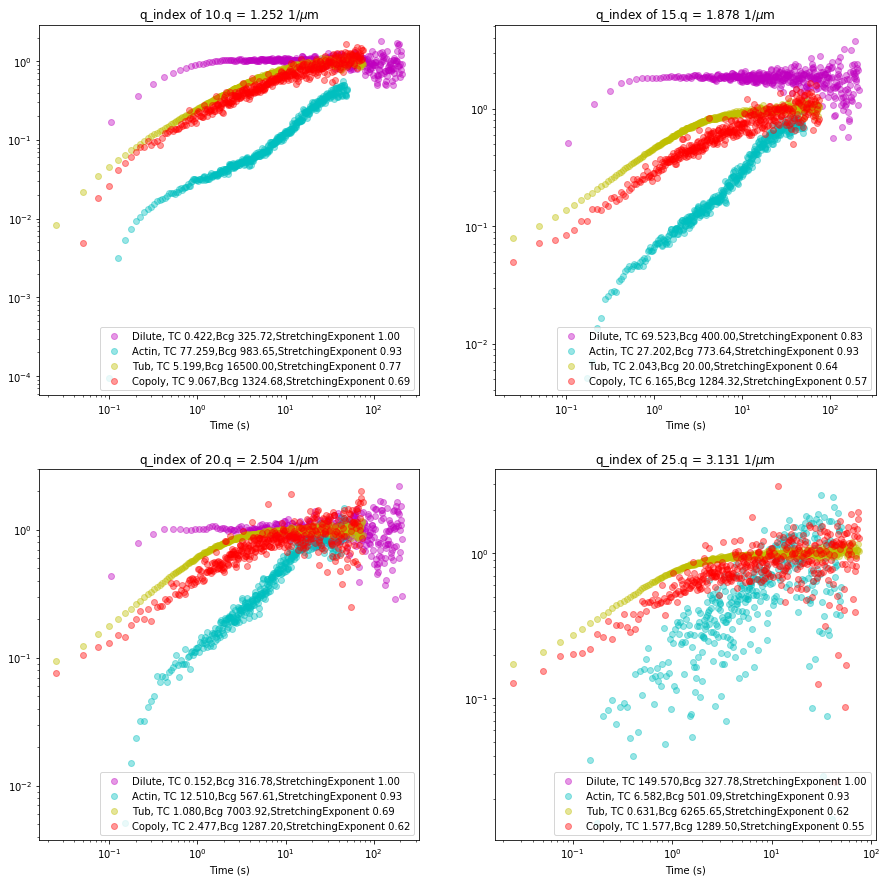

In [195]:
plt.figure(figsize=(15,15))
for i,q_index in enumerate([10,15,20,25]):
    ax = plt.subplot(2,2,i+1) #creating 4 subplots in a 2x2 grid
    for i in range(len(Samples)): ##For each Sample
        imDimension = Dimensions[i]
        col = ['mo','co','yo','ro','bo','ko']
        px = .196
        q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))


        for file in os.listdir(DataDirectories[i]):
            if file.startswith("AllResults"):
                filename = file

        f = open(DataDirectories[i]+filename,'rb')
        AllResults = pickle.load(f)
        f.close()
        SampleName= SampleNames[i]
        fitparamsA = AllResults['fitparams'+str(ROI)]
        theoryA = AllResults['theory'+str(ROI)]
        chiA = AllResults['chi2'+str(ROI)]
        times = Samples[SampleName]['times'+str(ROI)]
        ravs= Samples[SampleName]['ravs'+str(ROI)]
        denom= (fitparamsA[q_index][0])
        adjustedravs = (ravs[:,q_index]-fitparamsA[q_index][2])/(fitparamsA[q_index][0])
        adjustedtheoryA = (theoryA-fitparamsA[q_index][2])/(fitparamsA[q_index][0])

        plt.loglog(times,adjustedravs,col[i],alpha=0.4, label = '%s, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
                %(SampleName, fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))

        if(PlotFits==True):
            plt.loglog(times[:len(adjustedtheoryA[q_index,:])], adjustedtheoryA[q_index,:], '-b',lw=3)
    plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
    plt.xlabel("Time (s)")
    plt.legend(loc='lower right')
    #plt.savefig('Z:\ChristelleSummer2018\Data\AllResults\FitsAllROI'+str(ROI)+'.png')

In [186]:
fitparamsA[25][0]

4523.913260841938

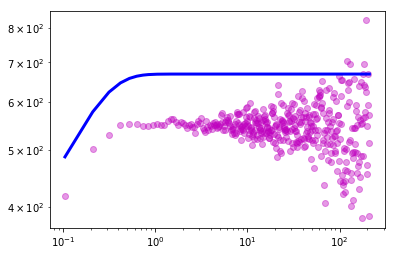